In [13]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

In [66]:
def _bootstrap( entry, nd_value, window=14, bootstraps=1000 ):
    bs = []
    for i in range( bootstraps ):
        trial = entry.sample( frac=1, replace=True ).set_index( "date" ).sort_index()
        trial = trial["ct"].fillna( nd_value ).rolling( window, on=temp.index, min_periods=0 ).mean()
        trial.name = i
        trial = trial.reset_index( drop=True )
        bs.append( trial )
    bs = pd.concat( bs, axis=1 )
    bs.index = entry["date"]
    bs = bs.T.describe( percentiles=[0.025, 0.5, 0.975] ).T
    return bs[["2.5%","50%", "97.5%"]]

In [77]:
hep = pd.read_csv( "../resources/hepatitis_temp/South_Bay.csv", parse_dates=["Date"], na_values=["ND"], index_col=0 )
hep = hep.mean( axis=1 ).reset_index()
hep.columns = ["date", "ct"]
hep["catchment"] = "Point Loma"

ND = np.ceil( hep["ct"].max() ) + 1
#hep["smooth_ct"] = savgol_filter(hep["ct"].fillna(ND), 13, 2 )

hep[["smooth_lower", "smooth_median", "smooth_upper"]] = _bootstrap(hep, ND).reset_index( drop=True )

hep.head()

,date,ct,catchment,smooth_lower,smooth_median,smooth_upper
0,2023-03-28,NaN,Point Loma,40.000000,40.0000,40.0
1,2023-03-30,NaN,Point Loma,39.249000,40.0000,40.0
2,2023-04-02,NaN,Point Loma,38.934667,40.0000,40.0
3,2023-04-04,NaN,Point Loma,38.402000,40.0000,40.0
4,2023-04-06,38.498,Point Loma,37.905935,39.6996,40.0


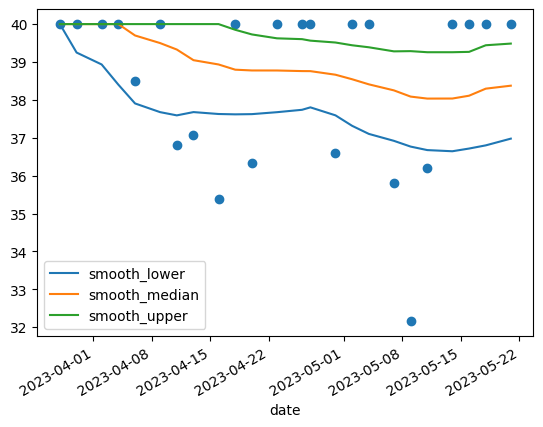

In [79]:
ax = hep.plot( x="date", y=["smooth_lower", "smooth_median", "smooth_upper"])
ax.scatter( "date", "ct", data=hep.fillna(ND) )

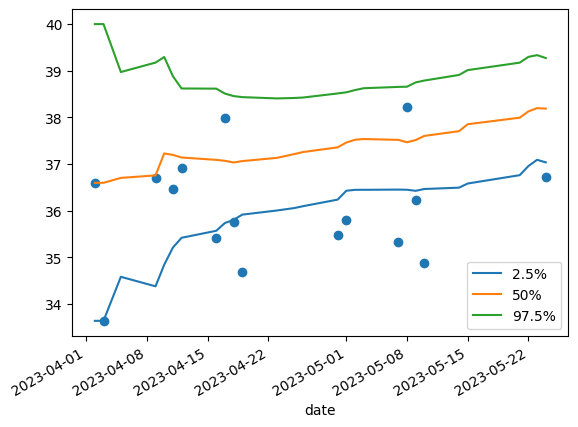

In [65]:
ax = bs.plot( y=["2.5%","50%","97.5%"] )
ax.scatter( "date", "ct", data=hep )